# Wheat varieties prediction using ANN
## Objective: To implement artificial neural network from scratch



## Artificial neural network

Artificial neural networks are relatively crude electronic networks of neurons based on the neural structure of the brain. They process records one at a time, and learn by comparing their classification of the record (i.e., largely arbitrary) with the known actual classification of the record. The errors from the initial classification of the first record is fed back into the network, and used to modify the networks algorithm for further iterations.

A neuron in an artificial neural network is

1. A set of input values (xi) and associated weights (wi).

2. A function (g) that sums the weights and maps the results to an output (y).

### Parameters
We can choose the dimensionality (the number of nodes) of the hidden layer. The more nodes we put into the hidden layer the more complex functions we will be able fit. But higher dimensionality comes at a cost. First, more computation is required to make predictions and learn the network parameters. A bigger number of parameters also means we become more prone to overfitting our data.
How to choose the size of the hidden layer? While there are some general guidelines and recommendations, it always depends on your specific problem and is more of an art than a science. We will play with the number of nodes in the hidden layer later on and see how it affects our output.








###Activation function
We also need to pick an *activation function* for our hidden layer. The activation function transforms the inputs of the layer into its outputs. A nonlinear activation function is what allows us to fit nonlinear hypotheses. Common chocies for activation functions are [tanh](https://reference.wolfram.com/language/ref/Tanh.html), the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function), or [ReLUs](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). 


Learning the parameters for our network means finding parameters ($W_1, b_1, W_2, b_2$) that minimize the error on our training data. But how do we define the error? We call the function that measures our error the *loss function*. A common choice with the softmax output is the [cross-entropy loss](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression). If we have $N$ training examples and $C$ classes then the loss for our prediction $\hat{y}$ with respect to the true labels $y$ is given by:

$$
\begin{aligned}
L(y,\hat{y}) = - \frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log\hat{y}_{n,i}
\end{aligned}
$$

Remember that our goal is to find the parameters that minimize our loss function. We can use [gradient descent](http://cs231n.github.io/optimization-1/) to find its minimum. I will implement the most vanilla version of gradient descent, also called batch gradient descent with a fixed learning rate. Variations such as SGD (stochastic gradient descent) or minibatch gradient descent typically perform better in practice. So if you are serious you'll want to use one of these, and ideally you would also [decay the learning rate over time](http://cs231n.github.io/neural-networks-3/#anneal).

### Gradient descent
As an input, gradient descent needs the gradients (vector of derivatives) of the loss function with respect to our parameters: $\frac{\partial{L}}{\partial{W_1}}$, $\frac{\partial{L}}{\partial{b_1}}$, $\frac{\partial{L}}{\partial{W_2}}$, $\frac{\partial{L}}{\partial{b_2}}$. To calculate these gradients we use the famous *backpropagation algorithm*, which is a way to efficiently calculate the gradients starting from the output. I won't go into detail how backpropagation works, but there are many excellent explanations ([here](http://colah.github.io/posts/2015-08-Backprop/) or [here](http://cs231n.github.io/optimization-2/)) floating around the web.

### Backpropagation formula
Applying the backpropagation formula we find the following:

$$
\begin{aligned}
& \delta_3 = \hat{y} - y \\
& \delta_2 = (1 - \tanh^2z_1) \circ \delta_3W_2^T \\
& \frac{\partial{L}}{\partial{W_2}} = a_1^T \delta_3  \\
& \frac{\partial{L}}{\partial{b_2}} = \delta_3\\
& \frac{\partial{L}}{\partial{W_1}} = x^T \delta_2\\
& \frac{\partial{L}}{\partial{b_1}} = \delta_2 \\
\end{aligned}
$$

## Dataset
Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

## Attributes
1.	area A,
2.	perimeter P,
3.	compactness C = 4*pi*A/P^2,
4.	length of kernel,
5.	width of kernel,
6.	asymmetry coefficient
7.	length of kernel groove.

## Target Class
Varieties of wheat: Kama, Rosa and Canadian.

## Source: https://www.kaggle.com/rwzhang/seeds-dataset



## Task 1: Implement Artificial Neural Networks from Scratch
1.	Obtain the seeds dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training (70%) and testing (30%) set, respectively.
4.	Implement Artificial Neural Networks from Scratch
5.	Train your neural model from scratch
6.	Evaluate the training and testing accuracy of your own model

## Task 2: Implement SKLEARN’s Artificial Neural Networks
1.	Obtain the seeds dataset
2.	Apply pre-processing techniques (if any)
3.	Divide dataset into training (70%) and testing (30%) set, respectively.
4.	Implement Artificial Neural Networks using SKLEARN’s library
5.	Train SKLEARN’s neural model 
6.	Evaluate the training and testing accuracy of SKLEARN’s model

# Task 3: Play with hyper-parameters
1.	Use SKLEARN’s neural model
2.	Evaluate the impact of various hyper-parameters of neural networks
3.	Plot the results
4.	Conclude the experiments by showing the impact of hyper-parameters on neural network

###Helpful links: 
https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/
https://medium.com/towards-artificial-intelligence/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf
https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/
http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

# Additonal work (not considered in evaluation)
Instead of batch gradient descent, use minibatch gradient descent ([more info](http://cs231n.github.io/optimization-1/#gd))

Use various activation functions

##Task 1: Implement Artificial Neural Networks from Scratch


In [7]:
# Load the libraries
import numpy as np 
import pandas as pd 
import missingno as msno 


from sklearn import preprocessing, linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder


In [5]:
# Load the dataset 
#data = pd.read_csv('seeds_dataset.txt', sep=" ", header=None)
data = pd.read_csv('seeds_dataset.txt', delimiter = "\t",header=None)

data.head(10)

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [6]:
data.shape

(210, 8)

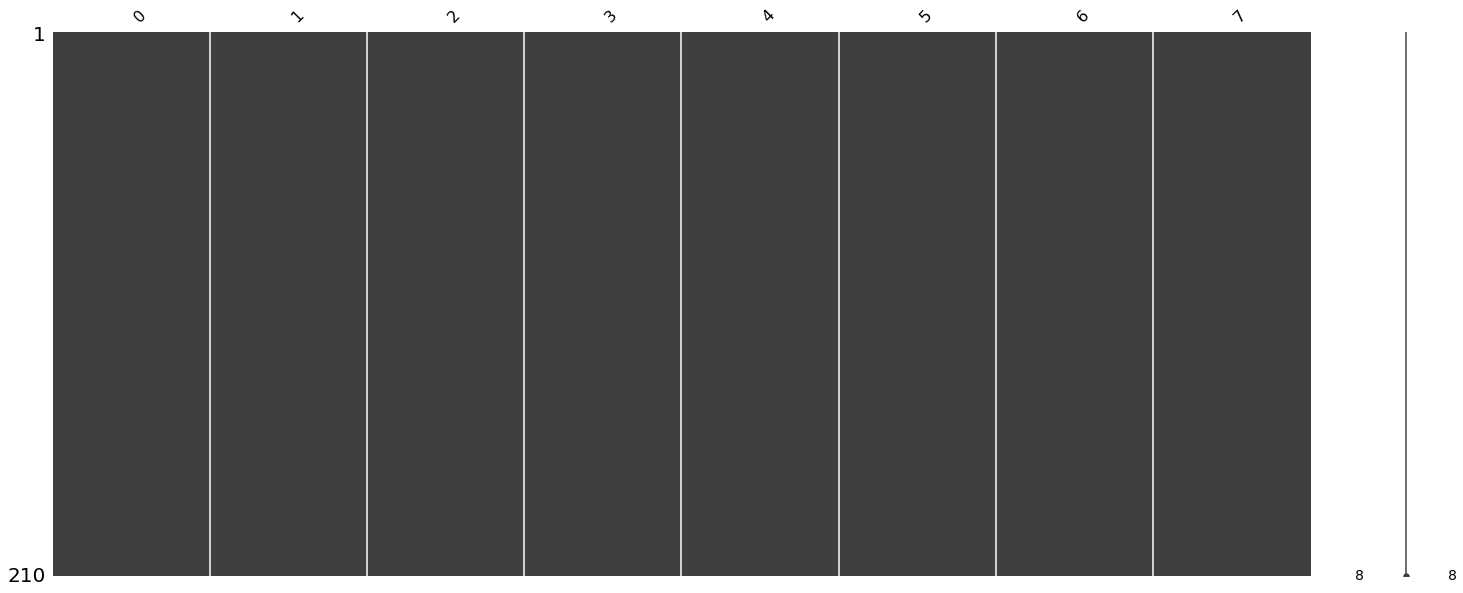

In [10]:
#Analysing Nan values
msno.matrix(data)

In [12]:
X=data.drop(7,axis=1)
y= data[7]


In [ ]:
# Preprocessing
# Encoding categorical variables (if any)
# Feature Scaling
# Filling missing values (if any)




In [ ]:
# Divide the dataset to training (70 %) and testing set (30 %)


In [ ]:
# Define initial parameters of ANN and gradient descent:
# input layer dimensionality, output layer dimensionality, learning rate (epsilon) for gradient descent and regularization strength (lambda)

In [ ]:
# Define total loss function

In [ ]:
# Prediction function using activation function


In [ ]:
# Write downn ANN code from scratch

In [ ]:
# Train your own ANN model


In [ ]:
# Test your own ANN model and evaluate performance in terms of accuracy

##Task 2: Implement SKLEARN’s Artificial Neural Networks

In [ ]:
#Obtain the training and testing set

In [ ]:
# Build SKLEARN's ANN model


In [ ]:
# Test your own ANN model and evaluate performance in terms of accuracy

# Task 3: Play with hyper-parameters


1.	Use SKLEARN’s neural model
2.	Evaluate the impact of various hyper-parameters of neural networks
3.	Plot the results
4.	Conclude the experiments by showing the impact of hyper-parameters on neural network